# Using Supervised Machine Learning Methods to predict song popularity

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.formula.api import ols
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.datasets
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import roc_curve

file=open('genre.csv')
music_df= pd.read_csv(file)

In [3]:

music_df.groupby('genre')['artist_popularity'].sum()


genre
blues         41809
classical     49066
electronic    75230
hiphop        58191
jazz          46150
pop           86171
reggae        44909
rock          69061
Name: artist_popularity, dtype: int64

<AxesSubplot: xlabel='genre', ylabel='artist_popularity'>

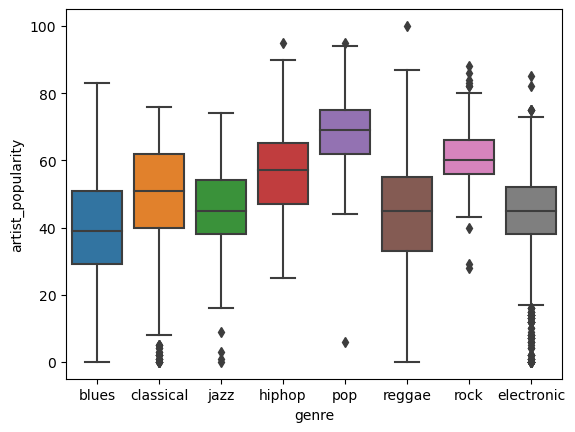

In [32]:
sns.boxplot(data=music_df, x="genre", y="artist_popularity")

In [5]:

#Encoding Dummy Variables
music_dummies=pd.get_dummies(music_df['genre'], drop_first=True)
print(music_dummies.head())

   classical  electronic  hiphop  jazz  pop  reggae  rock
0          0           0       0     0    0       0     0
1          0           0       0     0    0       0     0
2          0           0       0     0    0       0     0
3          0           0       0     0    0       0     0
4          0           0       0     0    0       0     0


In [9]:
music_dummies=pd.concat([music_df, music_dummies], axis=1)
music_dummies= music_dummies.drop('genre',axis=1)

In [10]:
music_dummies=pd.get_dummies(music_df, drop_first=True)
print(music_dummies.columns)

Index(['artist_popularity', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'genre_classical',
       'genre_electronic', 'genre_hiphop', 'genre_jazz', 'genre_pop',
       'genre_reggae', 'genre_rock'],
      dtype='object')


# Linear regression with dummy variable

In [11]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression

In [14]:
X= music_dummies.drop('artist_popularity', axis=1).values
y= music_dummies['artist_popularity'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2, random_state=42)

kf=KFold(n_splits=5, shuffle=True, random_state=42)
linreg=LinearRegression()
linreg_cv=cross_val_score(linreg, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
print(np.sqrt(-linreg_cv))

[12.70045693 12.42530145 12.95907918 12.51202342 12.55999092]


In [15]:
print(music_df.isna().sum().sort_values())


artist_popularity    0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
duration_ms          0
time_signature       0
genre                0
dtype: int64


# Scaling

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
X = music_df.drop("genre", axis=1).values
y = music_df["genre"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(np.mean(X), np.std(X))
print(np.mean(X_train_scaled), np.std(X_train_scaled))

18103.708347458956 70691.00156159616
-9.557410929495543e-16 0.9999999999999977


# Scaling in a pipeline

In [19]:
from sklearn.pipeline import Pipeline

In [20]:
steps = [('scaler', StandardScaler()),
('knn', KNeighborsClassifier(n_neighbors=6))]
pipeline = Pipeline(steps)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=21)
knn_scaled = pipeline.fit(X_train, y_train)
y_pred = knn_scaled.predict(X_test)
print(knn_scaled.score(X_test, y_test))

C:\Users\Mahsa\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.6635869565217392


C:\Users\Mahsa\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


comparing performance

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=21)
knn_unscaled = KNeighborsClassifier(n_neighbors=6).fit(X_train, y_train)
print(knn_unscaled.score(X_test, y_test))

0.19402173913043477


C:\Users\Mahsa\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


# CV and scaling in a pipeline

In [22]:
from sklearn.model_selection import GridSearchCV
steps = [('scaler', StandardScaler()),
('knn', KNeighborsClassifier())]
pipeline = Pipeline(steps)
parameters = {"knn__n_neighbors": np.arange(1, 50)}
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=21)
cv = GridSearchCV(pipeline, param_grid=parameters)
cv.fit(X_train, y_train)
y_pred = cv.predict(X_test)

C:\Users\Mahsa\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Mahsa\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [23]:
print(cv.best_score_)

0.6837426661839033


In [24]:
print(cv.best_params_)

{'knn__n_neighbors': 13}


# Evaluating multipe models

In [25]:

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier



In [26]:
X=music_df.drop(['genre'], axis=1).values
y=music_df['genre'].values

X_train, X_test, y_train, y_test= train_test_split(X,y, random_state=42)
scaler= StandardScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

In [29]:
models={ 'Logistic Regression': LogisticRegression(), 'KNN': KNeighborsClassifier()
       ,'Decision Tree': DecisionTreeClassifier()}
results=[]
for model in models.values():
    kf=KFold(n_splits=6, random_state=42, shuffle=True)
    cv_results= cross_val_score(model, X_train_scaled, y_train, cv=kf)
    results.append(cv_results)



C:\Users\Mahsa\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Mahsa\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

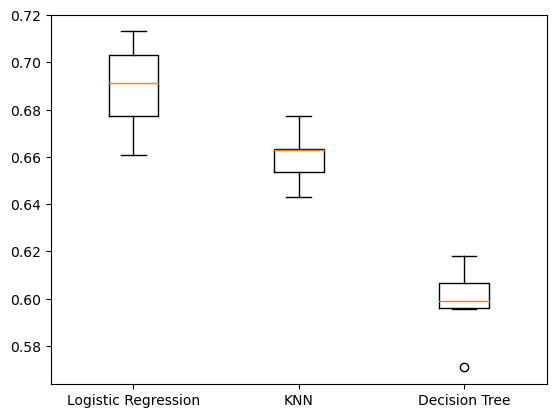

In [30]:
plt.boxplot(results, labels= models.keys())
plt.show()

# test set performance

In [31]:
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    test_score= model.score(X_test_scaled, y_test)
    print('{} Test Set Accuracy: {}'.format(name, test_score))

Logistic Regression Test Set Accuracy: 0.7104347826086956
KNN Test Set Accuracy: 0.6756521739130434
Decision Tree Test Set Accuracy: 0.6095652173913043


C:\Users\Mahsa\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
